In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [124]:
file = pd.read_csv("C:/Users/dharu/Downloads/EV_cars_India_2023.csv")

In [125]:
file.head()

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
0,MG Comet EV,7.98 lakh,17.3 kWh,230 km/full charge,41.42 Bhp,7 Hours,Automatic,NaN,NaN
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,NaN
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,NaN
3,MG ZS EV,23.38 - 27.40 lakh,50.3 kWh,461 km/full charge,174.33 Bhp,8.5 to 9 Hours,Automatic,NaN,NaN
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,NaN


In [126]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_name      30 non-null     object
 1   Car_price     30 non-null     object
 2   Batter_cap    27 non-null     object
 3   Drive_range   30 non-null     object
 4   Power         30 non-null     object
 5   Charge_time   30 non-null     object
 6   transmission  28 non-null     object
 7   Boot_space    12 non-null     object
 8   Top_speed     6 non-null      object
dtypes: object(9)
memory usage: 2.2+ KB


In [127]:
file["Top_speed"] = file["Top_speed"].fillna("0")

In [128]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_name      30 non-null     object
 1   Car_price     30 non-null     object
 2   Batter_cap    27 non-null     object
 3   Drive_range   30 non-null     object
 4   Power         30 non-null     object
 5   Charge_time   30 non-null     object
 6   transmission  28 non-null     object
 7   Boot_space    12 non-null     object
 8   Top_speed     30 non-null     object
dtypes: object(9)
memory usage: 2.2+ KB


In [129]:
data = file[['Batter_cap', 'Top_speed']]

In [130]:
file.dropna(subset=['Batter_cap'], inplace=True)
missing_data = file.isnull().sum()
numerical_summary = file.describe()

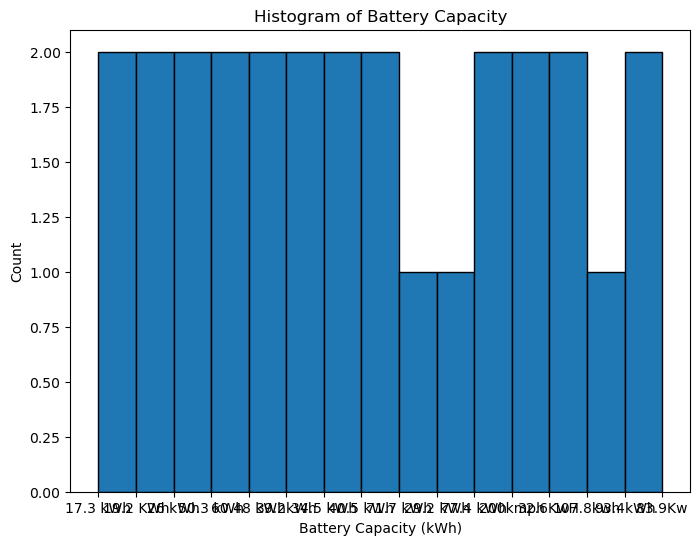

In [131]:
plt.figure(figsize=(8, 6))
plt.hist(file['Batter_cap'], bins=15, edgecolor='k')
plt.title("Histogram of Battery Capacity")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Count")
plt.show()

In [132]:
print("Missing Data Summary:")
print(missing_data)
print("\nSummary Statistics for Numerical Columns:")
print(numerical_summary)

Missing Data Summary:
Car_name         0
Car_price        0
Batter_cap       0
Drive_range      0
Power            0
Charge_time      0
transmission     2
Boot_space      15
Top_speed        0
dtype: int64

Summary Statistics for Numerical Columns:
           Car_name   Car_price Batter_cap          Drive_range      Power  \
count            27          27         27                   27         27   
unique           27          27         16                   16         16   
top     MG Comet EV  7.98  lakh   17.3 kWh  230  km/full charge  41.42 Bhp   
freq              1           1          2                    2          2   

       Charge_time transmission Boot_space Top_speed  
count           27           25         12        27  
unique          13           10          2         5  
top      Automatic    Automatic  Automatic         0  
freq             5           12         10        22  


In [134]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_name      27 non-null     object
 1   Car_price     27 non-null     object
 2   Batter_cap    27 non-null     object
 3   Drive_range   27 non-null     object
 4   Power         27 non-null     object
 5   Charge_time   27 non-null     object
 6   transmission  25 non-null     object
 7   Boot_space    12 non-null     object
 8   Top_speed     27 non-null     object
dtypes: object(9)
memory usage: 2.1+ KB


In [140]:
file["Car_name"] = file["Car_name"].fillna("Name")
file = file.dropna()

In [141]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 23
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_name      12 non-null     object
 1   Car_price     12 non-null     object
 2   Batter_cap    12 non-null     object
 3   Drive_range   12 non-null     object
 4   Power         12 non-null     object
 5   Charge_time   12 non-null     object
 6   transmission  12 non-null     object
 7   Boot_space    12 non-null     object
 8   Top_speed     12 non-null     object
dtypes: object(9)
memory usage: 960.0+ bytes


In [142]:
file

,Car_name,Car_price,Batter_cap,Drive_range,Power,Charge_time,transmission,Boot_space,Top_speed
1,Tata Tiago EV,8.69 - 11.99 lakh,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,0
2,Tata Tigor EV,12.49 - 13.75 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,0
4,BYD Atto 3,33.99 - 34.49 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,0
7,Tata Nexon EV Max,16.49 - 19.54 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,350 L (Liters),Automatic,0
9,Audi e-tron GT,1.7 cr,19.2 KWh,250 km/full charge,60.34 - 73.75 Bhp,58 Min(10-80%),240 L (Liters),Automatic,0
10,BMW i4,73.90 - 77.50 lakh,26 kWh,315 km/full charge,73.75 Bhp,7.5h,316 L (Liters),Automatic,0
12,Porsche Taycan,1.53 - 2.3 lakh,60.48 kWh,521 km/full charge,201.15 Bhp,9.5-10 Hours,440L L (Liters),Automatic,0
15,Strom Motors R3,4.50 lakh,40.5 kWh,453 km/full charge,141.04 Bhp,15 Hours,350 L (Liters),Automatic,0
16,Tata Nexon EV Prime,14.49 - 17.19 lakh,71.7 kWh,415 km/full charge,93.87 Bhp,1.5H,580 L (Liters),Automatic,0
17,Hyundai IONIQ 5,44.95 lakh,29.2 kWh,320 km/full charge,56.22 Bhp,10.5 Hours,315 L (Liters),Automatic,0


In [143]:
file['Batter_cap'] = file['Batter_cap'].str.extract('(\d+\.\d+)').astype(float)
file['Top_speed'] = file['Top_speed'].str.extract('(\d+)').astype(float)

C:\Users\dharu\AppData\Local\Temp\ipykernel_44284\1060639629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Batter_cap'] = file['Batter_cap'].str.extract('(\d+\.\d+)').astype(float)
C:\Users\dharu\AppData\Local\Temp\ipykernel_44284\1060639629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Top_speed'] = file['Top_speed'].str.extract('(\d+)').astype(float)


In [144]:
data = file[['Batter_cap', 'Top_speed']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [148]:
data

,Batter_cap,Top_speed
1,19.20,0.0
2,NaN,0.0
4,60.48,0.0
7,40.50,0.0
9,19.20,0.0
10,NaN,0.0
12,60.48,0.0
15,40.50,0.0
16,71.70,0.0
17,29.20,0.0


In [159]:
data["Batter_cap"] = data["Batter_cap"].fillna(data["Batter_cap"].mean())
data

C:\Users\dharu\AppData\Local\Temp\ipykernel_44284\4209919829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Batter_cap"] = data["Batter_cap"].fillna(data["Batter_cap"].mean())


,Batter_cap,Top_speed
1,19.2000,0.0
2,42.6575,0.0
4,60.4800,0.0
7,40.5000,0.0
9,19.2000,0.0
10,42.6575,0.0
12,60.4800,0.0
15,40.5000,0.0
16,71.7000,0.0
17,29.2000,0.0


In [160]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.54403859, -0.4472136 ],
       [ 0.        , -0.4472136 ],
       [ 1.17312705, -0.4472136 ],
       [-0.14201271, -0.4472136 ],
       [-1.54403859, -0.4472136 ],
       [ 0.        , -0.4472136 ],
       [ 1.17312705, -0.4472136 ],
       [-0.14201271, -0.4472136 ],
       [ 1.91165899, -0.4472136 ],
       [-0.88581048, -0.4472136 ],
       [ 0.        ,  2.23606798],
       [ 0.        ,  2.23606798]])

In [161]:
k = 3  # You can change the number of clusters as needed
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
file['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\dharu\AppData\Local\Temp\ipykernel_44284\4137560064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['Cluster'] = kmeans.fit_predict(scaled_data)


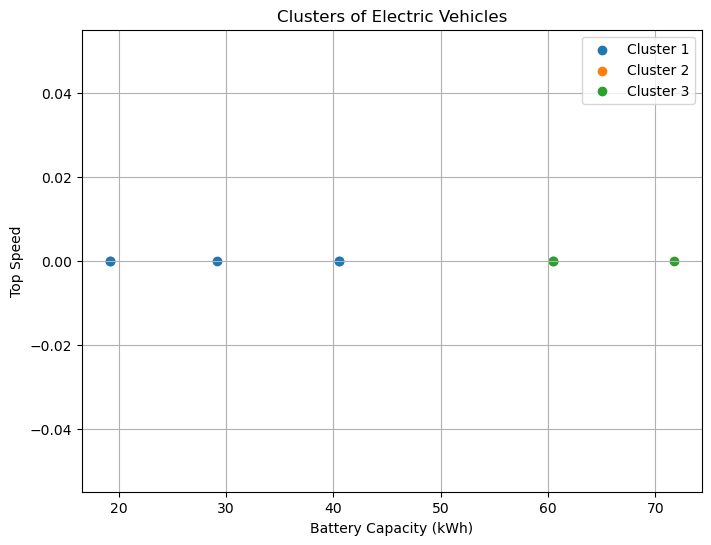

In [163]:
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(file[file['Cluster'] == cluster]['Batter_cap'], file[file['Cluster'] == cluster]['Top_speed'], label=f'Cluster {cluster + 1}')

plt.title('Clusters of Electric Vehicles')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Top Speed')
plt.legend()
plt.grid()
plt.show()